# DAY33 
默认大家已经有一定的神经网络基础，该部分已经在复试班的深度学习部分介绍完毕，如果没有，你需要自行了解下MLP的概念。

你需要知道
1. 梯度下降的思想
2. 激活函数的作用
3. 损失函数的作用
4. 优化器
5. 神经网络的概念

神经网络由于内部比较灵活，所以封装的比较浅，可以对模型做非常多的改进，而不像机器学习三行代码固定。




## PyTorch的安装

我们后续完成深度学习项目中，主要使用的包为pytorch，所以需要安装，你需要去配置一个新的环境。

未来在复现具体项目时候，新环境命名最好是python版本_pytorch版本_cuda版本，例如 py3.10_pytorch2.0_cuda12.2 ,因为复杂项目对运行环境有要求，所以需要安装对应版本的包。

我们目前主要不用这么严格，先创建一个命名为DL的新环境即可,也可以沿用之前的环境
``` 
conda create -n DL python=3.8
conda env list 
conda activate DL
conda install jupyter （如果conda无法安装jupyter就参考环境配置文档的pip安装方法）
pip insatll scikit-learn
然后对着下列教程安装pytorch


```
深度学习主要是简单的并行计算，所以gpu优势更大，简单的计算cpu发挥不出来他的价值，我们之前说过显卡和cpu的区别：
1. cpu是1个博士生，能够完成复杂的计算，串行能力强。
2. gpu是100个小学生，能够完成简单的计算，人多计算的快。

这里的gpu指的是英伟达的显卡，它支持cuda可以提高并行计算的能力。

如果你是amd的显卡、苹果的电脑，那样就不需要安装cuda了，直接安装pytorch-gpu版本即可。cuda只支持nvidia的显卡。

[安装教程](https://blog.csdn.net/Little_Carter/article/details/135934842?ops_request_misc=%257B%2522request%255Fid%2522%253A%25226f4f98b061723def7702948a6b9272a7%2522%252C%2522scm%2522%253A%252220140713.130102334..%2522%257D&request_id=6f4f98b061723def7702948a6b9272a7&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~top_positive~default-1-135934842-null-null.142^v101^pc_search_result_base9&utm_term=pytorch%E5%AE%89%E8%A3%85&spm=1018.2226.3001.4187)


或者去b站随便搜个pytorch安装视频。
1. 怕麻烦直接安装cpu版本的pytorch，跑通了用云服务器版本的pytorch-gpu
2. gpu的pytorch还需要额外安装cuda cudnn组件









## 准备工作




可以在你电脑的cmd中输入nvidia-smi来查看下显卡信息

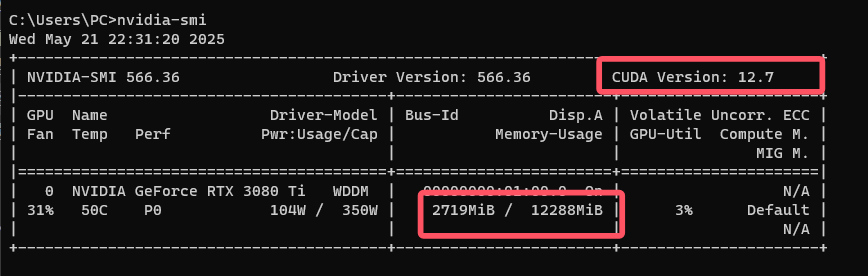

其中最重要的2个信息，分别是：
1. 显卡目前驱动下最高支持的cuda版本，12.7
2. 显存大小，12288 MiB ÷ 1024 = 12 

PS:之所以输入这个命令，可以弹出这些信息，是因为为系统正确安装了 NVIDIA 显卡驱动程序，并且相关路径被添加到了环境变量中。如果你不是英伟达的显卡，自然无法使用这个命令。

In [3]:
import torch
torch.cuda

<module 'torch.cuda' from 'd:\\Anaconda\\envs\\yolov5\\lib\\site-packages\\torch\\cuda\\__init__.py'>

In [4]:
import torch

# 检查CUDA是否可用
if torch.cuda.is_available():
    print("CUDA可用！")
    # 获取可用的CUDA设备数量
    device_count = torch.cuda.device_count()
    print(f"可用的CUDA设备数量: {device_count}")
    # 获取当前使用的CUDA设备索引
    current_device = torch.cuda.current_device()
    print(f"当前使用的CUDA设备索引: {current_device}")
    # 获取当前CUDA设备的名称
    device_name = torch.cuda.get_device_name(current_device)
    print(f"当前CUDA设备的名称: {device_name}")
    # 获取CUDA版本
    cuda_version = torch.version.cuda
    print(f"CUDA版本: {cuda_version}")
else:
    print("CUDA不可用。")

CUDA可用！
可用的CUDA设备数量: 1
当前使用的CUDA设备索引: 0
当前CUDA设备的名称: NVIDIA GeForce RTX 3080 Ti
CUDA版本: 11.1


这里的cuda版本是实际安装的cuda驱动的版本，需要小于显卡所支持的最高版本

上述这段代码，可以以后不断复用，检查是否有pytorch及cuda相关信息，我们今天先用cpu训练，不必在意，有没有cuda不影响。


## 数据的准备

In [5]:
# 仍然用4特征，3分类的鸢尾花数据集作为我们今天的数据集
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

# 加载鸢尾花数据集
iris = load_iris()
X = iris.data  # 特征数据
y = iris.target  # 标签数据
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 打印下尺寸
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


In [6]:
# 归一化数据，神经网络对于输入数据的尺寸敏感，归一化是最常见的处理方式
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #确保训练集和测试集是相同的缩放

In [7]:
# 将数据转换为 PyTorch 张量，因为 PyTorch 使用张量进行训练
# y_train和y_test是整数，所以需要转化为long类型，如果是float32，会输出1.0 0.0
X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

## 模型架构定义

定义一个简单的全连接神经网络模型，包含一个输入层、一个隐藏层和一个输出层。

定义层数+定义前向传播顺序

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

In [9]:
class MLP(nn.Module): # 定义一个多层感知机（MLP）模型，继承父类nn.Module
    def __init__(self): # 初始化函数
        super(MLP, self).__init__() # 调用父类的初始化函数
 # 前三行是八股文，后面的是自定义的

        self.fc1 = nn.Linear(4, 10)  # 输入层到隐藏层
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 3)  # 隐藏层到输出层
# 输出层不需要激活函数，因为后面会用到交叉熵函数cross_entropy，交叉熵函数内部有softmax函数，会把输出转化为概率

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# 实例化模型
model = MLP()

其实模型层的写法有很多，relu也可以不写，在后面前向传播的时候计算下即可，因为relu其实不算一个层，只是个计算而已。

In [10]:
    # def forward(self,x): #前向传播
    #     x=torch.relu(self.fc1(x)) #激活函数
    #     x=self.fc2(x) #输出层不需要激活函数，因为后面会用到交叉熵函数cross_entropy
    #     return x

## 模型训练（CPU版本）

### 定义损失函数和优化器

In [11]:
# 分类问题使用交叉熵损失函数
criterion = nn.CrossEntropyLoss()

# 使用随机梯度下降优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# # 使用自适应学习率的化器
# optimizer = optim.Adam(model.parameters(), lr=0.001)

### 开始循环训练

实际上在训练的时候，可以同时观察每个epoch训练完后测试集的表现：测试集的loss和准确度

In [12]:
# 训练模型
num_epochs = 20000 # 训练的轮数

# 用于存储每个 epoch 的损失值
losses = []

for epoch in range(num_epochs): # range是从0开始，所以epoch是从0开始
    # 前向传播
    outputs = model.forward(X_train)   # 显式调用forward函数
    # outputs = model(X_train)  # 常见写法隐式调用forward函数，其实是用了model类的__call__方法
    loss = criterion(outputs, y_train) # output是模型预测值，y_train是真实标签

    # 反向传播和优化
    optimizer.zero_grad() #梯度清零，因为PyTorch会累积梯度，所以每次迭代需要清零，梯度累计是那种小的bitchsize模拟大的bitchsize
    loss.backward() # 反向传播计算梯度
    optimizer.step() # 更新参数

    # 记录损失值
    losses.append(loss.item())

    # 打印训练信息
    if (epoch + 1) % 100 == 0: # range是从0开始，所以epoch+1是从当前epoch开始，每100个epoch打印一次
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/20000], Loss: 1.0730
Epoch [200/20000], Loss: 1.0258
Epoch [300/20000], Loss: 0.9757
Epoch [400/20000], Loss: 0.9200
Epoch [500/20000], Loss: 0.8577
Epoch [600/20000], Loss: 0.7908
Epoch [700/20000], Loss: 0.7247
Epoch [800/20000], Loss: 0.6639
Epoch [900/20000], Loss: 0.6109
Epoch [1000/20000], Loss: 0.5661
Epoch [1100/20000], Loss: 0.5285
Epoch [1200/20000], Loss: 0.4967
Epoch [1300/20000], Loss: 0.4695
Epoch [1400/20000], Loss: 0.4456
Epoch [1500/20000], Loss: 0.4244
Epoch [1600/20000], Loss: 0.4052
Epoch [1700/20000], Loss: 0.3877
Epoch [1800/20000], Loss: 0.3715
Epoch [1900/20000], Loss: 0.3564
Epoch [2000/20000], Loss: 0.3423
Epoch [2100/20000], Loss: 0.3290
Epoch [2200/20000], Loss: 0.3165
Epoch [2300/20000], Loss: 0.3046
Epoch [2400/20000], Loss: 0.2935
Epoch [2500/20000], Loss: 0.2829
Epoch [2600/20000], Loss: 0.2729
Epoch [2700/20000], Loss: 0.2635
Epoch [2800/20000], Loss: 0.2545
Epoch [2900/20000], Loss: 0.2461
Epoch [3000/20000], Loss: 0.2381
Epoch [3100/20000],

如果你重新运行上面这段训练循环，模型参数、优化器状态和梯度会继续保留，导致训练结果叠加，模型参数和优化器状态（如动量、学习率等）不会被重置。这会导致训练从之前的状态继续，而不是从头开始

### 可视化结果

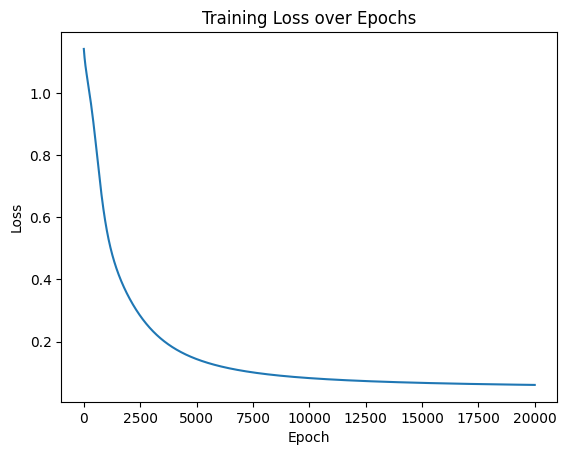

In [13]:
import matplotlib.pyplot as plt
# 可视化损失曲线
plt.plot(range(num_epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()